In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
# import mplfinance as mpf
import asyncio
import plotly.express as px
from pathlib import Path
import time as t
import threading
import requests
from requests import Request, Session
import datetime
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

%matplotlib inline

C:\Users\ChrisKwit\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")

Bad key savefig.frameon in file C:\Users\ChrisKwit\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\ChrisKwit\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
htt

In [2]:
from dotenv import load_dotenv
load_dotenv()
cmc_key = os.getenv('CMC_KEY')

***_INDEX TOKENS_***

In [3]:
# Request data from Kuc API & Convert to Json
btc = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTC-USDT&startAt=1620360000&endAt=0')
btc_j = btc.json()

# Convert json to DataFrame
btc_df = pd.DataFrame(btc_j['data'])

# Rename Date, Open, & Close columns and remove others
btc_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)

btc_df.drop(columns = [3,4,5,6], inplace=True)

# Create A DF with Median Price 

btc_median = btc_df[['Open','Close']].astype(float)

btc_median['BTC Median'] = btc_median[['Open','Close']].mean(axis=1)
btc_median = btc_median['BTC Median']

btc_df_date = pd.to_datetime(btc_df['Date'], unit='s')
btc_date = [btc_df_date, btc_median]
btc_result = pd.concat(btc_date, axis=1, join = 'outer')
btc_plot = btc_result.set_index('Date')
btc_result.set_index('Date', inplace=True)

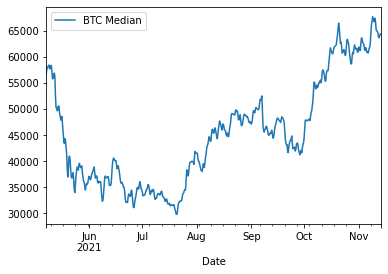

In [4]:
btc_plot.plot();

In [5]:
eth = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=ETH-USDT&startAt=1620360000&endAt=0')
eth_j = eth.json()


eth_df = pd.DataFrame(eth_j['data'])


eth_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
eth_df.drop(columns = [3,4,5,6], inplace=True)


eth_median = eth_df[['Open','Close']].astype(float)


eth_median['ETH Median'] = eth_median[['Open','Close']].mean(axis=1)


eth_median = eth_median['ETH Median']


eth_df_date = pd.to_datetime(eth_df['Date'], unit='s')


eth_date = [eth_df_date, eth_median]


eth_result = pd.concat(eth_date, axis=1, join = 'outer')


eth_result.set_index('Date', inplace=True)

eth_result

,ETH Median
Date,
2021-11-13 16:00:00,4667.595
2021-11-13 08:00:00,4662.250
2021-11-13 00:00:00,4654.745
2021-11-12 16:00:00,4618.820
2021-11-12 08:00:00,4641.135
...,...
2021-05-08 16:00:00,3770.255
2021-05-08 08:00:00,3579.080
2021-05-08 00:00:00,3503.850


In [ ]:
#Create function to pull crypto data from KuCoin
def crypto_price_df(ticker):
    crypto = requests.get(f'https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol={ticker}-USDT&startAt=1620360000&endAt=0')
    crypto_j = crypto.json()
    crypto_df = pd.DataFrame(crypto_j['data'])
    crypto_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
    crypto_df.drop(columns = [3,4,5,6], inplace=True)
    crypto_median = crypto_df[['Open','Close']].astype(float)
    crypto_median[f'{ticker} Median'] = crypto_median[['Open','Close']].mean(axis=1)
    crypto_median = crypto_median[f'{ticker} Median']
    crypto_df_date = pd.to_datetime(crypto_df['Date'], unit='s')
    crypto_date = [crypto_df_date, crypto_median]
    crypto_result = pd.concat(crypto_date, axis=1, join = 'outer')
    crypto_result.set_index('Date', inplace=True)
    return crypto_result

In [ ]:
#Create function to pull crypto data from Binance
def binance_price_df(ticker):
    crypto = requests.get(f'https://api.binance.com/api/v3/klines?symbol={ticker}USDT&interval=8h&startTime=1620360000000&limit=666')
    crypto_j = crypto.json()
    crypto_df = pd.DataFrame(crypto_j)
    crypto_df.rename(columns={0:'Date',1:'Open',2:'Close'}, inplace=True)
    crypto_df.drop(columns = [3,4,5,6], inplace=True)
    crypto_median = crypto_df[['Open','Close']].astype(float)
    crypto_median[f'{ticker} Median'] = crypto_median[['Open','Close']].mean(axis=1)
    crypto_median = crypto_median[f'{ticker} Median']
    crypto_df_date = pd.to_datetime(crypto_df['Date'], unit='ms')
    crypto_date = [crypto_df_date, crypto_median]
    crypto_result = pd.concat(crypto_date, axis=1, join = 'outer')
    crypto_result.set_index('Date', inplace=True)
    return crypto_result

In [ ]:
def enter_ticker():
    t = input('Please ender the Ticker: ')
    return crypto_price_df(t)

In [ ]:
enter_ticker();

In [ ]:
bnb_result = crypto_price_df('BNB')
doge_result = crypto_price_df('DOGE')
ltc_result = crypto_price_df('LTC')
ada_result = crypto_price_df('ADA')
xrp_result = crypto_price_df('XRP')
usdc_result = crypto_price_df('USDC')
link_result = crypto_price_df('LINK')
uni_result = crypto_price_df('UNI')
dot_result = crypto_price_df('DOT')
sol_result = binance_price_df('SOL')
luna_result = crypto_price_df('LUNA')
avax_result = crypto_price_df('AVAX')
algo_result = crypto_price_df('ALGO')
bch_result = crypto_price_df('BCH')
matic_result = binance_price_df('MATIC')
vet_result = crypto_price_df('VET')
xlm_result = crypto_price_df('XLM')

In [ ]:
index_tokens = pd.concat([btc_result, dot_result, eth_result, ada_result, doge_result, ltc_result, bnb_result, 
                          xrp_result, uni_result, link_result, usdc_result, sol_result,
                          luna_result, avax_result,algo_result,bch_result,matic_result,vet_result,xlm_result], axis=1, join='outer')
index_tokens

In [ ]:
index_results1 = pd.DataFrame(index_tokens.values*markdom_result.values, columns=markdom_result.columns, index=index_tokens.index)
index_results1['SUM'] = (index_results1['BTC']+index_results1['DOT']+index_results1['ETH']+index_results1['ADA']+index_results1['DOGE']+
                         index_results1['LINK']+index_results1['UNI']+index_results1['XRP']+index_results1['BNB']+index_results1['LTC']+
                         index_results1['USDT']+index_results1['SOL']+index_results1['LUNA']+index_results1['AVAX']+index_results1['ALGO']+
                         index_results1['BCH']+index_results1['MATIC']+index_results1['VET']+index_results1['XLM'])
ax = index_results1['SUM'].plot()


In [ ]:
btc_weight = 0.50749
dot_weight = 0.01924
eth_weight = 0.23604
ada_weight= 0.02868
doge_weight = 0.01440
ltc_weight = 0.00779
bnb_weight = 0.04367
xrp_weight = 0.02372
uni_weight = 0.00661
link_weight = 0.00661
usdt_weight = 0.03069
sol_weight = 0.02927
luna_weight = 0.00968
avax_weight = 0.00803
algo_weight = 0.00590
bch_weight = 0.00531
matic_weight = 0.00496
vet_weight = 0.00437
xlm_weight = 0.00389

In [ ]:
index_returns = (btc_weight*index_tokens['BTC Median']+dot_weight*index_tokens['DOT Median']+
                 eth_weight*index_tokens['ETH Median']+ada_weight*index_tokens['ADA Median']+
                 doge_weight*index_tokens['DOGE Median']+ltc_weight*index_tokens['LTC Median']+
                 bnb_weight*index_tokens['BNB Median']+xrp_weight*index_tokens['XRP Median']+
                 uni_weight*index_tokens['UNI Median']+link_weight*index_tokens['LINK Median']+
                 usdt_weight*index_tokens['USDT Median']+sol_weight*index_tokens['SOL Median']+
                 luna_weight*index_tokens['LUNA Median']+avax_weight*index_tokens['AVAX Median']+
                 algo_weight*index_tokens['ALGO Median']+bch_weight*index_tokens['BCH Median']+
                 matic_weight*index_tokens['MATIC Median']+vet_weight*index_tokens['VET Median']+
                 xlm_weight*index_tokens['XLM Median'])

In [ ]:
index_returns.plot(kind='line');

In [ ]:
index_pct = index_returns.pct_change().dropna()
index_pct.plot();

***_MEME/GAMING/NFT TOKENS_***

In [ ]:
doge_result = crypto_price_df('DOGE')
mana_result = crypto_price_df('MANA')
enj_result = crypto_price_df('ENJ')
sand_result = crypto_price_df('SAND')
chz_result = crypto_price_df('CHZ')
dgb_result = crypto_price_df('DGB')

In [ ]:
mgn_index_tokens = pd.concat([doge_result, mana_result, enj_result, sand_result, chz_result, 
                          dgb_result], axis=1, join='outer')
mgn_index_tokens

In [ ]:
doge_weight = 0.0121
mana_weight = 0.00217
enj_weight = 0.00091
sand_weight = 0.00093
chz_weight = 0.0011
dgb_weight = 0.00034

In [ ]:
mgn_index_returns = (doge_weight*mgn_index_tokens['DOGE Median']+mana_weight*mgn_index_tokens['MANA Median']+
                     enj_weight*mgn_index_tokens['ENJ Median']+sand_weight*mgn_index_tokens['SAND Median']+
                     chz_weight*mgn_index_tokens['CHZ Median']+dgb_weight*mgn_index_tokens['DGB Median'])                 

In [ ]:
mgn_index_returns.plot(kind='line');

***_DEFI TOKENS_***

In [ ]:
uni = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=UNI-USDT&startAt=1620360000&endAt=0')
uni_j = uni.json()
uni_j

In [ ]:
luna = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=LUNA-USDT&startAt=1620360000&endAt=0')
luna_j = luna.json()
luna_j

In [ ]:
avax = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=AVAX-USDT&startAt=1620360000&endAt=0')
avax_j = avax.json()
avax_j

***_STORAGE TOKENS_***

In [ ]:
fil = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=FIL-USDT&startAt=1620360000')
fil_j = fil.json()
fil_j

In [ ]:
btt = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=BTT-USDT&startAt=1620360000')
btt_j = btt.json()
btt_j

In [ ]:
storj = requests.get('https://api.kucoin.com/api/v1/market/candles?type=8hour&symbol=STORJ-USDT&startAt=1620360000')
storj_j = storj.json()
storj_j